In [1]:
#-*- coding: utf-8 -*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data_cust

In [2]:
data_cust = pd.read_csv("customers_cleaned.csv", encoding='utf-8')

In [3]:
data_cust.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


## Nombre de clients : 

In [4]:
data_cust["client_id"].count()

8623

## Valeur de la colonne 'sex'

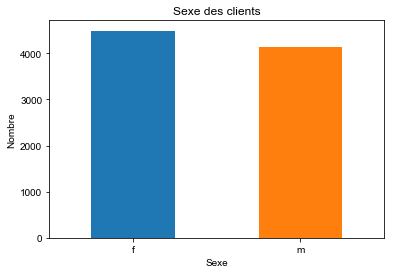

In [5]:
#répartition des clients par sexe
data_cust["sex"].value_counts(dropna = False).plot(kind='bar')
plt.style.use(['seaborn-dark'])
plt.title('Sexe des clients')
plt.xlabel('Sexe')
plt.ylabel('Nombre')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/sexe_des_clients.png")
plt.show()

#Mettre le nombre de femmes et d'hommes en haut du graph ; Et la fréquence dans chacune des barres

## Dates de naissance 

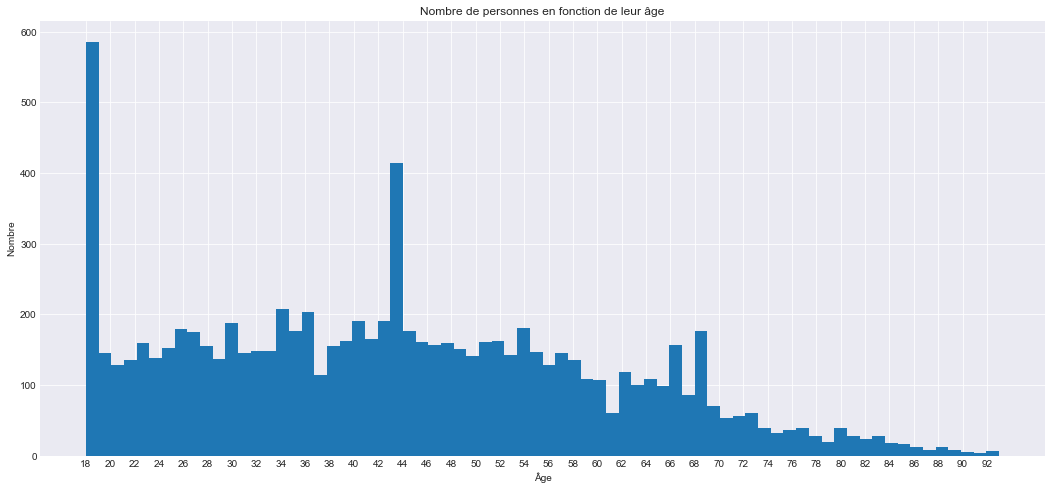

In [6]:
#Client par age :

data_cust['age'].hist(bins= 72, figsize=(18,8))
plt.xlabel('Âge')
plt.xticks(range(18,93, 2))
plt.ylabel('Nombre')
plt.title('Nombre de personnes en fonction de leur âge')
plt.savefig("Graphiques/nb_personnes_par_ages.png")
plt.show()

#Le pic des clients âgés de 18 ans est trop important, il doit donc s'agir de personne ayant mis 18ans pour
#pouvoir acheter sur le site, mais qui ont en fait moins de 18 ans.

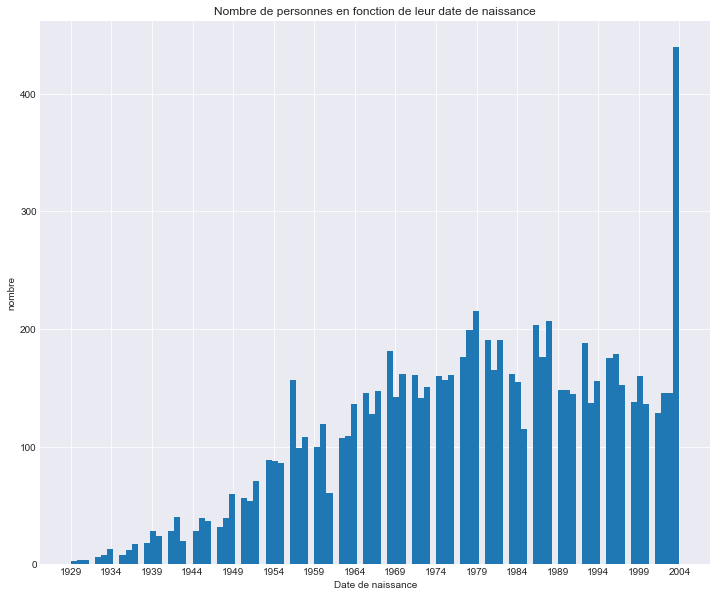

In [7]:
#On veut maintenant connaître la répartition des gens en fonction de leur date de naissance : 

data_cust['birth'].hist(bins= 100, figsize=(12,10))
plt.xlabel('Date de naissance')
plt.xticks(range(1929,2009, 5))
plt.ylabel('nombre')
plt.title('Nombre de personnes en fonction de leur date de naissance')
plt.savefig("Graphiques/nb_personnes_par_dates_de_naissances.png")
plt.show()

#Il peut être intéressant de créer des tranches d'âges pour avoir une idée plus précise
#Voyons cela dans la partie d'après

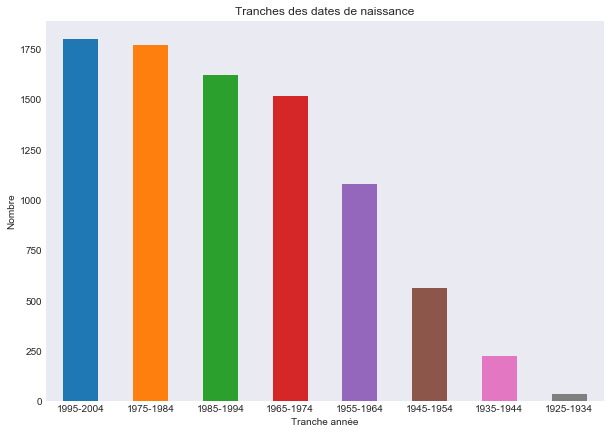

In [8]:
#Création de tranche de date de naissance :

#On veut qu'une tranche soit créée toutes les 10 annnées
#Début à 1925

#Création de la fonction tranche
def tranche (value):
    if 1925<=value<1935 :
        return "1925-1934"
    elif 1935<=value<1945:
        return "1935-1944"
    elif 1945<=value<1955:
        return "1945-1954"
    elif 1955<=value<1965:
        return "1955-1964" 
    elif 1965<=value<1975:
        return "1965-1974"
    elif 1975<=value<1985:
        return "1975-1984"
    elif 1985<=value<1995:
        return "1985-1994"
    elif 1995<=value<2005:
        return "1995-2004"
    elif 2005<=value<2015:
        return "2005-2014" 
    elif 2015<=value<2025:
        return "2015-2024"
    else:
        return 'ERROR'

#On applique cette fonction à 'Birth' tout en créant une nouvelle colonne au df
data_cust['tranche'] = data_cust['birth'].map(tranche)

#On affiche ensuite le graph représentant le nombre de personnes pour chaque tranche
data_cust['tranche'].value_counts().plot(kind='bar', figsize=(10,7))
plt.title('Tranches des dates de naissance')
plt.xlabel('Tranche année')
plt.ylabel('Nombre')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/tranches_des_dates_de_naissances.png")
plt.show()

#Sorted le df avant de plot 

# Data_prod

In [9]:
data_prod = pd.read_csv("products_cleaned.csv", encoding='utf-8')

In [10]:
data_prod.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


## Price 

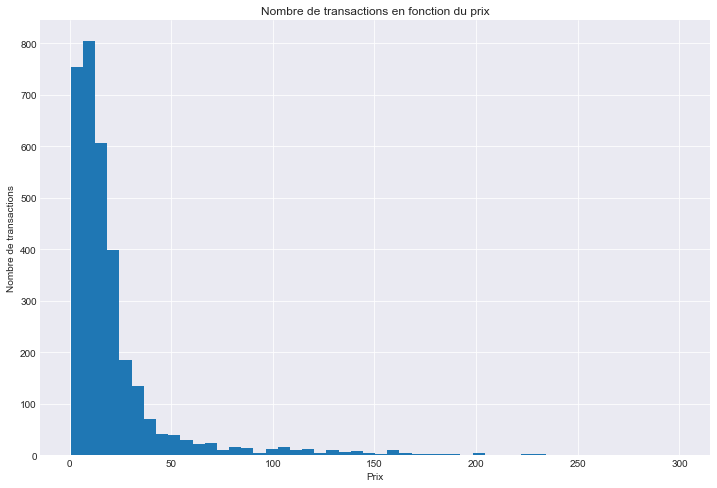

In [11]:
#On cherche à savoir la répartition des achats en fonction du prix :

data_prod['price'].hist(bins=50, figsize=(12,8))
plt.xlabel('Prix')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions en fonction du prix')
plt.savefig("Graphiques/Nb_transac_par_prix.png")
plt.show()


## Catégorie de produits 

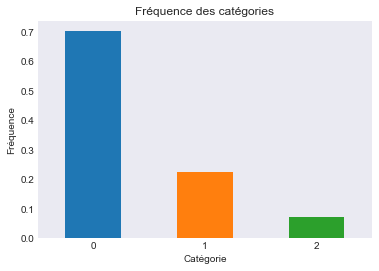

In [12]:
#Tout d'abord, on regarde la fréquence de chaque catégorie : 

data_prod['categ'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Catégorie')
plt.ylabel('Fréquence')
plt.title('Fréquence des catégories')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()

#Afficher la fréquence des catégories sur le graph

## Prix en fonction de la catégorie 

--------------------
On traite ici la catégorie  0
Analyse des mesures de tendances centrales : 
Le mode est 4.99
La moyenne est 11.732794627383296
La médiane est 10.32


Analyse des mesures de forme : 
Le Skewness Empirique est 0.8389024205603539
Le Kurtosis Empirique est 0.33389197441246976


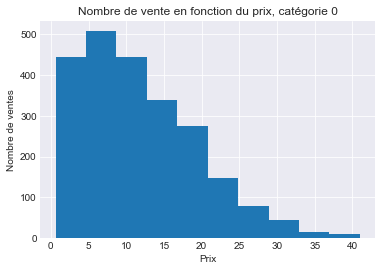



Analyse des mesures de dispersion : 
La variance est 57.19106768066409
L'écart type est 7.562477615217389


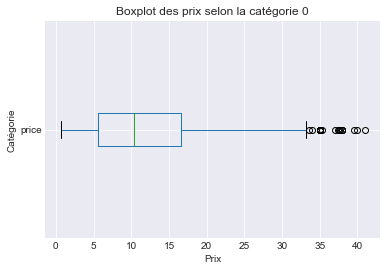

--------------------
On traite ici la catégorie  1
Analyse des mesures de tendances centrales : 
Le mode est 22.99
La moyenne est 25.531420838971624
La médiane est 22.99


Analyse des mesures de forme : 
Le Skewness Empirique est 0.8120109621070365
Le Kurtosis Empirique est 0.2993533794236898


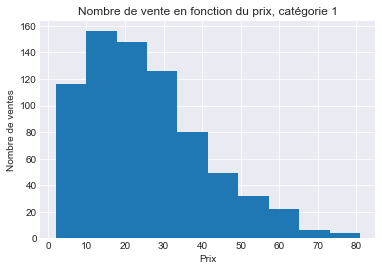



Analyse des mesures de dispersion : 
La variance est 237.61364304211
L'écart type est 15.414721633623813


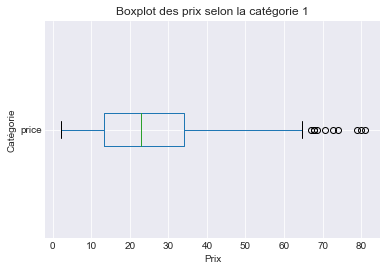

--------------------
On traite ici la catégorie  2
Analyse des mesures de tendances centrales : 
Le mode est 50.99
La moyenne est 108.35468619246883
La médiane est 101.99


Analyse des mesures de forme : 
Le Skewness Empirique est 0.9310209579538592
Le Kurtosis Empirique est 0.808968484300689


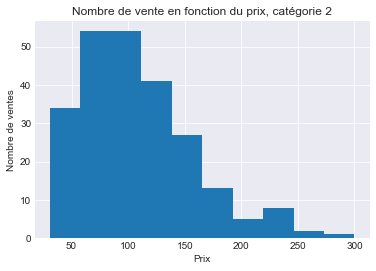



Analyse des mesures de dispersion : 
La variance est 2446.0578977048704
L'écart type est 49.45763740520639


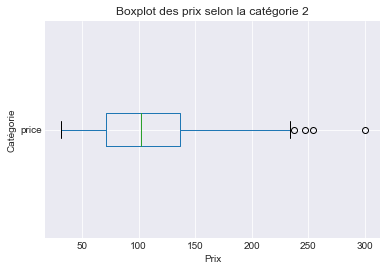

In [13]:
#Calculons les mesures de tendances centrales, de formes, et de dispersions pour le prix de chaque catégorie : 

for cat in data_prod['categ'].unique() : 
    sous_echantillon = data_prod[data_prod.categ == cat]
    print ('-'*20)
    print('On traite ici la catégorie ',cat)
    print('Analyse des mesures de tendances centrales : ')
    print('Le mode est', sous_echantillon['price'].mode()[0])
    print('La moyenne est', sous_echantillon['price'].mean())
    print('La médiane est', sous_echantillon['price'].median())
    print('\n')
    print('Analyse des mesures de forme : ')
    #Mesure d'asymétrie :
    print('Le Skewness Empirique est', sous_echantillon['price'].skew())
    #Mesure d'applatissement :
    print('Le Kurtosis Empirique est', sous_echantillon['price'].kurtosis())
    
    sous_echantillon['price'].hist()
    plt.title('Nombre de vente en fonction du prix, catégorie {}'.format(cat))
    plt.xlabel('Prix')
    plt.ylabel('Nombre de ventes')
    plt.savefig("Graphiques/Nb_vente_par_prix_categ{}.png".format(cat))
    plt.show()    
    
    print('\n')
    print('Analyse des mesures de dispersion : ')
    print('La variance est', sous_echantillon['price'].var(ddof=0))
    print("L'écart type est",sous_echantillon['price'].std(ddof=0))
    
    sous_echantillon.boxplot(column='price', vert=False) #Vert = False signifie que la boite à moustache sera à l'horizontale
    plt.title('Boxplot des prix selon la catégorie {}'.format(cat))
    plt.xlabel('Prix')
    plt.ylabel('Catégorie')
    plt.savefig("Graphiques/boxplot_prix_categ{}.png".format(cat))
    plt.show()

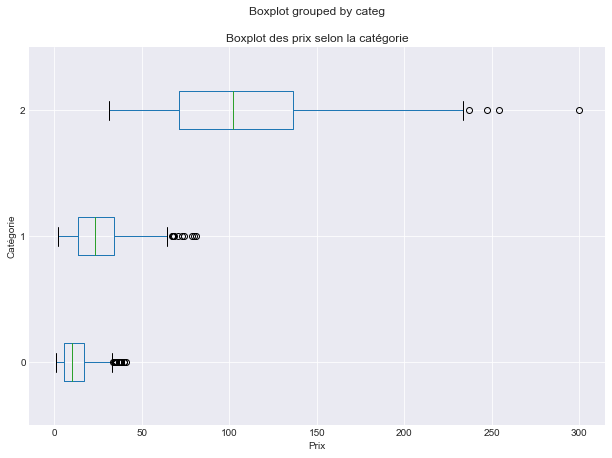

In [14]:
#Boxplot des 3 categ : 
prix_categ = data_prod[['categ', 'price']]
data_prod.boxplot(column='price', by='categ', vert = False, figsize=(10,7)) #Vert = False signifie que la boite à moustache sera à l'horizontale
plt.title('Boxplot des prix selon la catégorie')
plt.xlabel('Prix')
plt.ylabel('Catégorie')
plt.savefig("Graphiques/boxplot_prix_all_categ.png")
plt.show()

In [15]:
print('Il semble donc que chaque catégorie ait une signification, les prix fonctionnent presque par tranche :')
print('    La catégorie 0 pourrait donc être des livres de type normal')
print('    La catégorie 1 des livres plus chers, peut-être en bundle')
print('    La catégorie 2 représenterait alors des livres collectors, ou bien des ouvrages scientifiques et/ou rares.')

Il semble donc que chaque catégorie ait une signification, les prix fonctionnent presque par tranche :
    La catégorie 0 pourrait donc être des livres de type normal
    La catégorie 1 des livres plus chers, peut-être en bundle
    La catégorie 2 représenterait alors des livres collectors, ou bien des ouvrages scientifiques et/ou rares.


# Transactions

In [16]:
data_transac = pd.read_csv("transactions_cleaned.csv", encoding='utf-8')

In [17]:
data_transac.head()

,id_prod,date,session_id,client_id,time,year,month,day,hour,minute,seconde
0,0_1483,2021-04-10,s_18746,c_4450,18:37:28.723910,2021,4,10,18,37,28.723910
1,2_226,2022-02-03,s_159142,c_277,01:55:53.276402,2022,2,3,1,55,53.276402
2,1_374,2021-09-23,s_94290,c_4270,15:13:46.938559,2021,9,23,15,13,46.938559
3,0_2186,2021-10-17,s_105936,c_4597,03:27:18.783634,2021,10,17,3,27,18.783634
4,0_1351,2021-07-17,s_63642,c_1242,20:34:25.800563,2021,7,17,20,34,25.800563


## Clients achetant le plus 

In [18]:
top_client = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how="left")

top_client = top_client[["client_id", "price"]]

top_client = top_client.groupby("client_id").sum().sort_values(by = "price", ascending=False)

print("La moyenne d'achat est de :", top_client.mean())
print(top_client[0:5])
print("\n")
print("On a donc 4 clients qui sortent du lot, à voir en détails")

La moyenne d'achat est de : price    674.161192
dtype: float64
                   price
client_id               
c_1609     162007.340000
c_4958     144257.210000
c_6714      73220.805589
c_3454      54466.385589
c_7959       2564.250000


On a donc 4 clients qui sortent du lot, à voir en détails


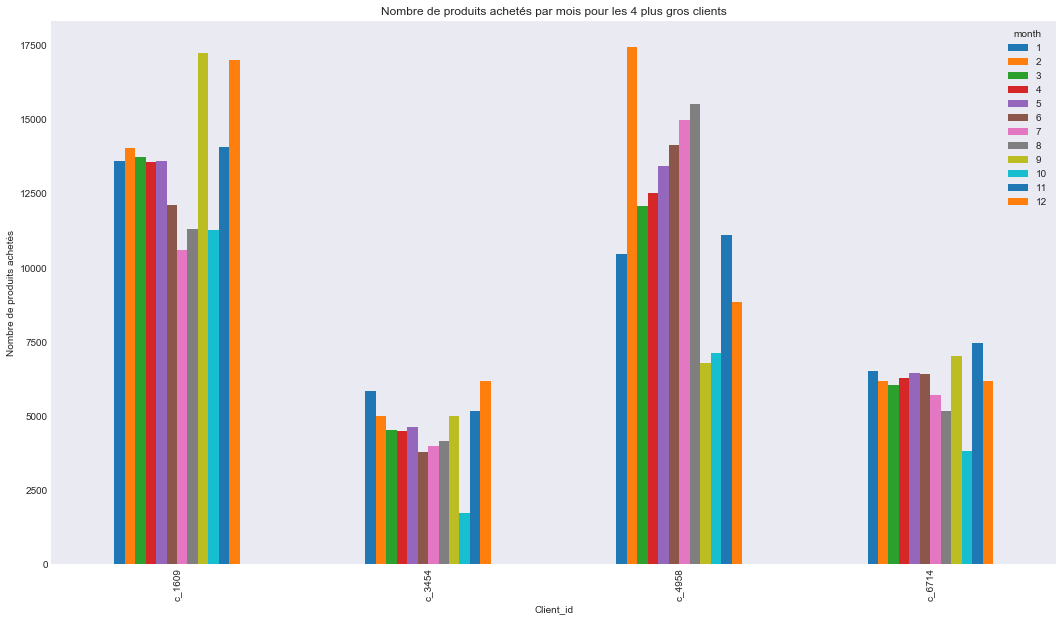

In [19]:
#On cherche à savoir la répartition des achats pour ces 4 clients : 
gros_clients = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how="left")
gros_clients = gros_clients[["client_id", "month", "price"]].groupby(["client_id", "month"]).sum()

gros_clients = gros_clients.loc[["c_1609", "c_4958", "c_6714", "c_3454"]]
gros_clients = gros_clients.reset_index()

gros_clients = pd.crosstab(index=gros_clients["client_id"], columns=gros_clients["month"], values=gros_clients["price"], aggfunc=sum)

gros_clients.plot(kind="bar", figsize=(18,10), stacked=False)
plt.title("Nombre de produits achetés par mois pour les 4 plus gros clients")
plt.xlabel("Client_id")
plt.ylabel("Nombre de produits achetés")
plt.savefig("Graphiques/nbr_prod_achetes_4_gros_clients.png")
plt.show()

#Les commandes sont homogènes dans le temps, ce client est donc un professionnel qui se fournit chez nous

## Ventes en fonction du temps

In [20]:
from datetime import datetime

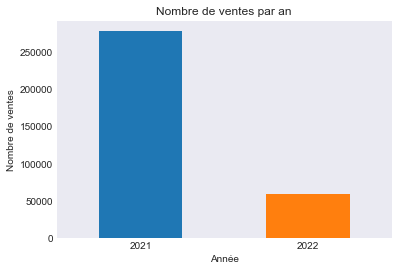

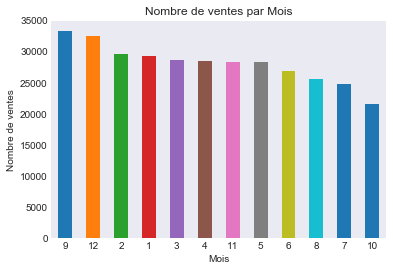

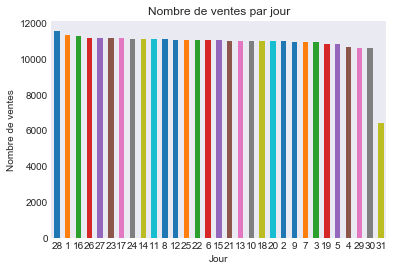

In [21]:
#Vérifions le nombre de ventes en fonction du temps: 

data_transac['year'].value_counts().plot(kind='bar')
plt.title('Nombre de ventes par an')
plt.xlabel('Année')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()

data_transac['month'].value_counts().plot(kind='bar')
plt.title('Nombre de ventes par Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()

data_transac['day'].value_counts().plot(kind='bar')
plt.title('Nombre de ventes par jour')
plt.xlabel('Jour')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()



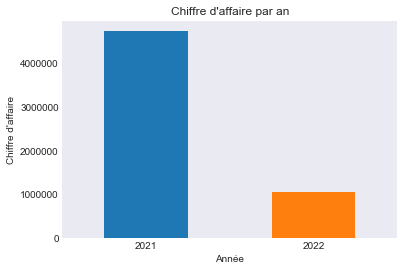

Le chiffre d'affaire pour l'année 2021 est de 4741902.0
Le chiffre d'affaire pour l'année 2022 est de 1055884.0


In [22]:
#Calcul du CA par an : 

ca = pd.merge(data_transac, data_prod, left_on = 'id_prod', right_on ='id_prod', how='left')

ca_an = ca[["session_id", "year", "price"]]

ca_an = ca_an.groupby(["year"]).sum()

ca_an = ca_an["price"].rename("CA")

ca_an.plot(kind="bar")
plt.xlabel("Année")
plt.ylabel("Chiffre d'affaire")
plt.title("Chiffre d'affaire par an")
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/CA_année.png")
plt.show()

ca_an = ca_an.reset_index()
for annee in ca_an['year'].iteritems():
    print("Le chiffre d'affaire pour l'année", annee[1], "est de", ca_an.loc[annee[0]][1].round(0))

#Revoir le print

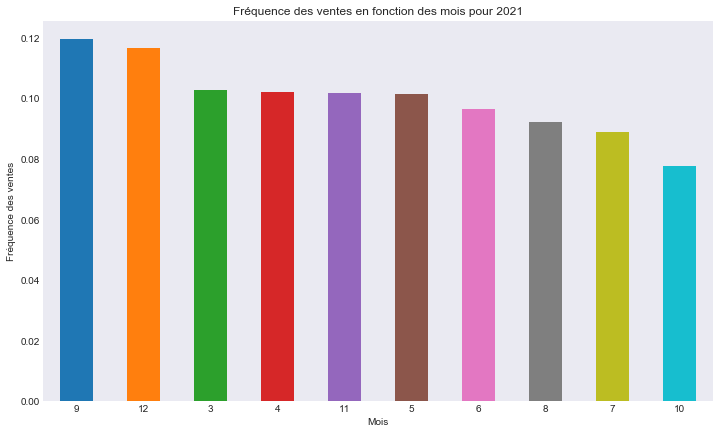

<function matplotlib.pyplot.show(*args, **kw)>

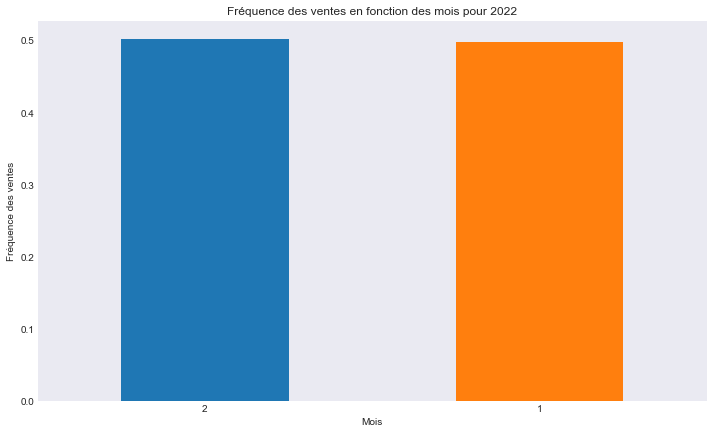

In [23]:
#Quel mois fait-on le plus de ventes : 
data_transac_2021 = data_transac[data_transac['year'] == 2021]
data_transac_2022 = data_transac[data_transac['year'] == 2022]

data_transac_2021['month'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 7))
plt.title('Fréquence des ventes en fonction des mois pour 2021')
plt.xlabel('Mois')
plt.ylabel('Fréquence des ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()

data_transac_2022['month'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 7))
plt.title('Fréquence des ventes en fonction des mois pour 2022')
plt.xlabel('Mois')
plt.ylabel('Fréquence des ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show


#On peut voir que les deux mois avec le plus de ventes sont Septembre et Décembre 
#Septembre car rentrée des classes, décembre pour noël 
#Octobre est un mois vide car dépenses faites en septembre pour la rentrée

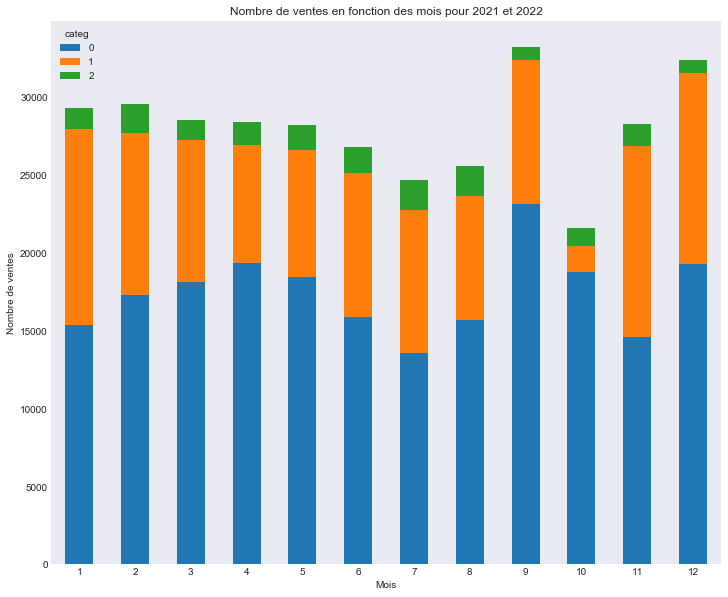

In [24]:
nbr_ventes = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how="left")

nbr_ventes = nbr_ventes[["month", "categ"]]

nbr_ventes = pd.crosstab(index=nbr_ventes['month'], columns=nbr_ventes['categ'])

nbr_ventes.plot(kind="bar", figsize=(12, 10), stacked=True)
plt.title('Nombre de ventes en fonction des mois pour 2021 et 2022')
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/nbr_ventes_par_mois_2021_2022")
plt.show()

#Baisse considérable du nbr de ventes pour le mois d'octobre dans la categ 1, voir plus en détails

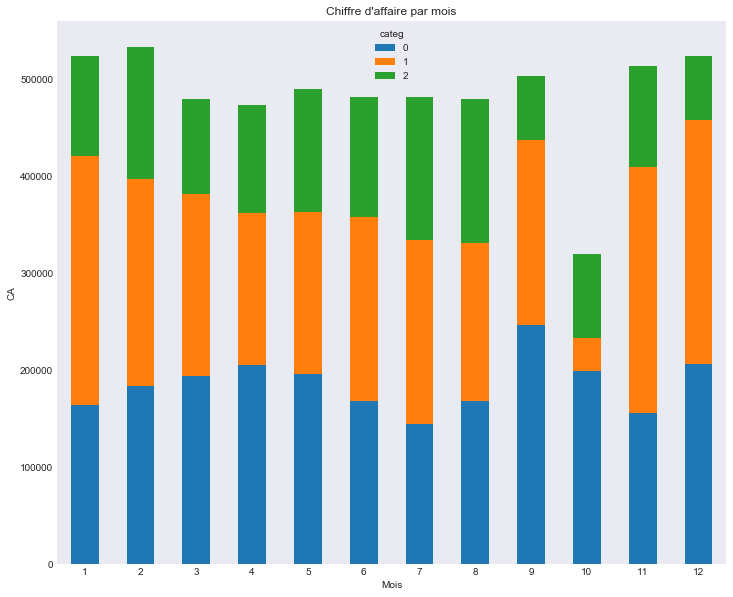

In [25]:
#Chiffre d'affaire par mois : 
ca_mois = ca[["session_id", "price", "month", "year", "categ"]]

ca_mois = ca_mois.groupby(["year", "month", "categ"]).sum()
ca_mois = ca_mois["price"].rename("CA")
ca_mois = ca_mois.reset_index()

ca_mois = pd.crosstab(index=ca_mois['month'], columns=ca_mois['categ'], values=ca_mois['CA'], aggfunc=sum)

ca_mois.plot(kind = "bar", figsize=(12,10), stacked = True)
plt.xlabel("Mois")
plt.ylabel("CA")
plt.title("Chiffre d'affaire par mois")
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/CA_mois.png")
plt.show()

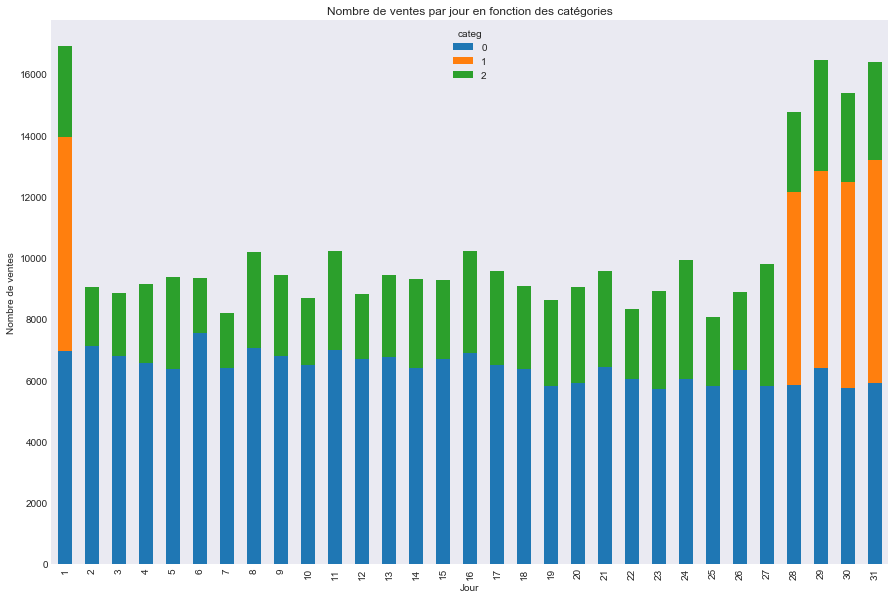

Du 2 au 27, la categ 1 n'a pas été achetée. Cela provient donc d'un bug de production (ou de stock), qui affecte le CA du mois


In [26]:
#Regardons de plus près le mois d'Octobre : 
octobre = ca[["client_id", "month", "day", "price", "categ"]]
octobre = octobre[octobre['month'] == 10]

octobre_days = pd.crosstab(index=octobre["day"], columns=octobre["categ"], values=octobre["price"], aggfunc=sum)

octobre_days.plot(kind='bar', figsize=(15,10), stacked=True)
plt.xlabel("Jour")
plt.ylabel("Nombre de ventes")
plt.title("Nombre de ventes par jour en fonction des catégories")
plt.savefig("Graphiques/octobre_details.png")
plt.show()
print("Du 2 au 27, la categ 1 n'a pas été achetée. Cela provient donc d'un bug de production (ou de stock), qui affecte le CA du mois")

In [27]:
#Puis on regarde quels jours il y a le plus de ventes: 

weekday = []
for item in data_transac['date'].iteritems() :
    date = item[1]
    d = datetime.strptime(date, '%Y-%m-%d').date()
    d = datetime.weekday(d)
    weekday.append(d)

day = []
for date in weekday:
    if date == 0 :
        jour = 'Lundi'
    elif date == 1 :
        jour = 'Mardi'
    elif date == 2 :
        jour = 'Mercredi'
    elif date == 3 :
        jour = 'Jeudi'
    elif date == 4 :
        jour = 'Vendredi'
    elif date == 5 :
        jour = 'Samedi'
    elif date == 6 :
        jour = 'Dimanche'
    else :
        jour = 'Error'
    day.append(jour)

data_transac['weekday'] = day


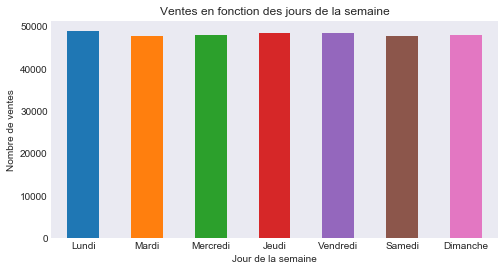

In [28]:
#Quel jour fait-on le plus de vente : 

#Création d'une liste contenant les abscisses dans l'ordre : 
order = ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"]

data_transac['weekday'].value_counts().loc[order].plot(kind='bar', figsize=(8, 4))
plt.title('Ventes en fonction des jours de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/ventes_jours_de_la_semaine")
plt.show()

#Afficher le nombre en fonction des jours

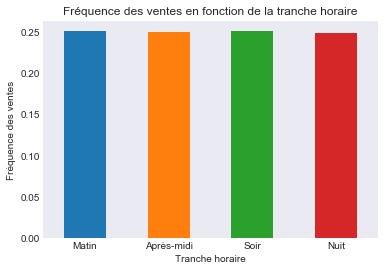

Aucune tranche de la journée ne se démarque des autres pour les ventes


In [29]:
#A quelle moment de la journée fait-on le plus de ventes (peu importe le jour):
 
#Création de la fonction tranche
def tranche (value):
    if 0<=int(value)<6 :
        return "Nuit"
    elif 6<=int(value)<12:
        return "Matin"
    elif 12<=int(value)<18:
        return "Après-midi"
    elif 18<=int(value)<24:
        return "Soir" 
    else:
        return 'ERROR'

#On applique cette fonction à 'Birth' tout en créant une nouvelle colonne au df
data_transac['tranche'] = data_transac['hour'].map(tranche)

#Création d'une liste contenant les abscisses dans l'odre : 
order = ["Matin", "Après-midi", "Soir", "Nuit"]

#On affiche ensuite le graph représentant le nombre de personnes pour chaque tranche
data_transac['tranche'].value_counts(normalize = True).loc[order].plot(kind='bar')
plt.title('Fréquence des ventes en fonction de la tranche horaire')
plt.xlabel('Tranche horaire')
plt.ylabel('Fréquence des ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/ventes_par_tranches_horaires.png")
plt.show()

print('Aucune tranche de la journée ne se démarque des autres pour les ventes')

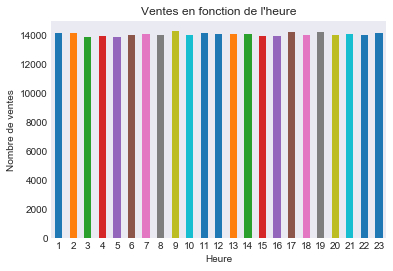

In [30]:
#A quelle heure fait-on le plus de ventes (sans tranche horaire):

#création d'une liste contenant les abscisses dans l'ordre : 
order = range(1,24)

data_transac['hour'].value_counts().loc[order].plot(kind='bar')
plt.title("Ventes en fonction de l'heure")
plt.xlabel('Heure')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()

Courbe de Lorenz et indice de Gini

In [31]:
#préparation du Df:
gens_achat = pd.merge(data_cust, data_transac, left_on="client_id", right_on="client_id", how='right')

#Merge left parce que certains id_prod ne sont pas du tout utilisés 
gens_achat = pd.merge(gens_achat, data_prod, left_on="id_prod", right_on="id_prod", how="left")

gens_achat = gens_achat[['client_id', 'price']]

gens_achat = gens_achat.groupby("client_id").sum()

gens_achat.head()

,price
client_id,
c_1,300.65
c_10,586.18
c_100,222.87
c_1000,980.02
c_1001,1102.45


In [32]:
data_gini = gens_achat

#On enlève l'index afin de récupérer l'accés à la colonne 'client_id' par la suite : 
data_gini = data_gini.reset_index()
data_gini = data_gini["price"]

data_gini = data_gini.sort_values()

data_gini.head()

7918    4.15
7889    4.99
750     5.57
8480    6.08
8151    6.31
Name: price, dtype: float64

In [33]:
def gini(arr):
    ##D'abord trier les valeurs
    sorted_arr = arr.copy()
    sorted_arr.sort_values()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

print("Le coefficient de gini est de {}".format(gini(data_gini)))

Le coefficient de gini est de 0.4397174906380501


In [34]:
#On calcule ensuite la cumsum():
data_lorenz = data_gini.sort_values()
data_lorenz = data_gini.cumsum() / data_gini.sum()

data_lorenz.head()

7918    7.157904e-07
7889    1.576464e-06
750     2.537175e-06
8480    3.585851e-06
8151    4.674198e-06
Name: price, dtype: float64

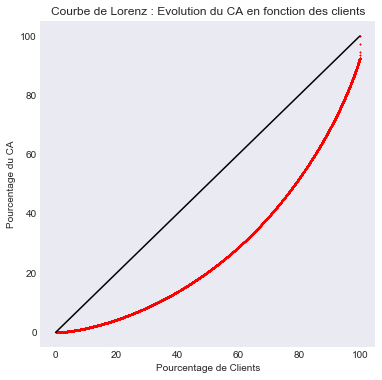

In [35]:
fig, ax = plt.subplots(figsize=[6,6])
## Courbe de Lorenz
ax.scatter(np.arange(data_lorenz.size)/(data_lorenz.size-1)*100, data_lorenz*100, 
           marker='x', color='red', s=1)

## courbe à coéfficient d'égalité : 
ax.plot([0,100], [0,100], color='black')
plt.title("Courbe de Lorenz : Evolution du CA en fonction des clients")
plt.xlabel("Pourcentage de Clients")
plt.ylabel("Pourcentage du CA")
plt.savefig("Graphiques/courbe_de_lorenz.png")
plt.show()

A quelle tranche horaire fait-on le plus de ventes (en fonction du jour): 

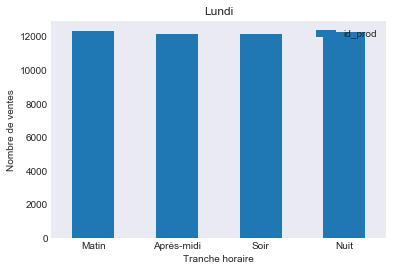

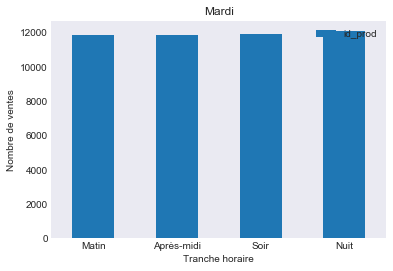

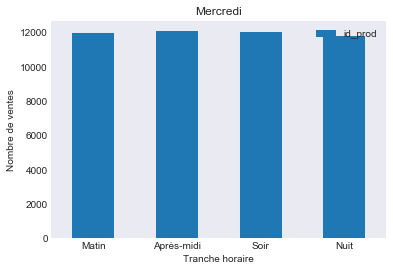

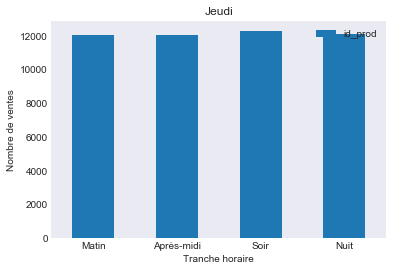

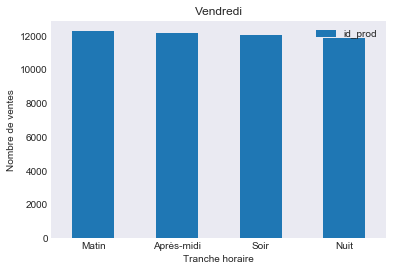

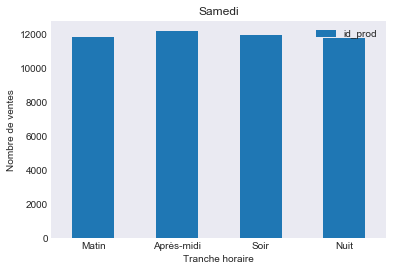

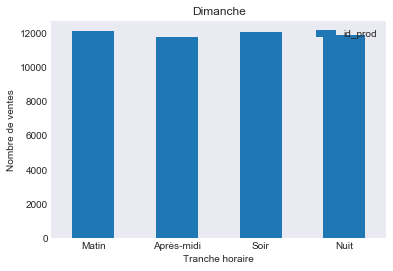



Il semble que l'on ait toujours les mêmes ventes peu importe le moment de la journée, et le jour de la semaine. A regarder plus en détails, c'est bizarre.


In [36]:
#A quelle tranche horaire fait-on le plus de ventes (en fonction du jour): 
heure_jour = data_transac[['weekday', 'tranche', 'id_prod']]

heure_jour = heure_jour.groupby(['weekday','tranche']).count()

order = ["Matin", "Après-midi", "Soir", "Nuit"]

heure_jour.loc['Lundi',:].loc[order].plot(kind='bar')
plt.title('Lundi')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')

heure_jour.loc['Mardi',:].loc[order].plot(kind='bar')
plt.title('Mardi')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')

heure_jour.loc['Mercredi',:].loc[order].plot(kind='bar')
plt.title('Mercredi')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')

heure_jour.loc['Jeudi',:].loc[order].plot(kind='bar')
plt.title('Jeudi')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')

heure_jour.loc['Vendredi',:].loc[order].plot(kind='bar')
plt.title('Vendredi')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')

heure_jour.loc['Samedi',:].loc[order].plot(kind='bar')
plt.title('Samedi')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')

heure_jour.loc['Dimanche',:].loc[order].plot(kind='bar')
plt.title('Dimanche')
plt.xlabel('Tranche horaire')
plt.ylabel('Nombre de ventes')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.show()
print('\n')


print("Il semble que l'on ait toujours les mêmes ventes peu importe le moment de la journée, et le jour de la semaine. A regarder plus en détails, c'est bizarre.")


## Session_id par client_id

In [37]:
#Est-ce qu'un client se connecte plusieurs fois (session_id multiples pour un client_id)

connexions = data_transac[['session_id','client_id']].groupby('client_id').count()
print('la moyenne de connexions est de : {} par utilisateur'.format(connexions['session_id'].mean()))
print('\n')
#On fait rentrer la notion de temps dans la formule pour savoir combien de fois un client se connecte par mois

connexions_mois = data_transac[['session_id', 'client_id', 'month', 'year']].groupby(['year', 'month', 'client_id']).count()
print("La moyenne de connexions par mois et par utilisateur est de {}".format(connexions_mois['session_id'].mean()))

#Voir comment passer un round(0) là dessus pour plus de clarté

print('\n')
print("Un session_id correspond ici à une vente, on peut donc dire qu'un utilisateur achète en moyenne {} fois par mois".format(connexions_mois['session_id'].mean()))

#Problème de moyenne là, 4.9 * 14 donne pas 39, à revoir

la moyenne de connexions est de : 39.1646511627907 par utilisateur


La moyenne de connexions par mois et par utilisateur est de 4.950701120028222


Un session_id correspond ici à une vente, on peut donc dire qu'un utilisateur achète en moyenne 4.950701120028222 fois par mois


# Analyse bivariée

panier moyen 

In [38]:
panier_m = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how="left")

panier_m = panier_m[["client_id", "price"]]

panier_m = panier_m.groupby('client_id').sum()

panier_m = panier_m['price'].mean()

print("Le panier moyen est de {} euros".format(panier_m))

Le panier moyen est de 674.1611916100705 euros


Produits non vendus

In [39]:
# Regardons si des produits n'ont été achetés par personne : 
invendus = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how='right')

#Les livres invendus sont caractérisées par des cellules NaN dans toutes les colonnes à pars id_prod, prix et categ :
invendus = invendus.fillna(0)
invendus = invendus[invendus.date == 0]

invendus.to_csv("Invendus.csv")

invendus_nbr = invendus["id_prod"].count()
print("{} produits n'ont pas été achetés".format(invendus_nbr))

22 produits n'ont pas été achetés


Top 5 produits les plus achetés / moins achetés 

In [40]:
top_cinq = pd.merge(data_transac, data_prod, left_on="id_prod", right_on="id_prod", how='left')

top_cinq["nbr_ventes"] = 1

top_cinq = top_cinq[["nbr_ventes", "id_prod", "price"]]

#Un session_id correspond à une vente : 

top_cinq = top_cinq.groupby(["id_prod", "price"]).count()

#Top 5 meilleures ventes : 
best_sellers = top_cinq.sort_values(by= "nbr_ventes" ,ascending = False)[0:5]
print("Voici les meilleures ventes :")
print(best_sellers)

print("-------------------")

#Moins bonnes ventes :
worst_sellers = top_cinq.sort_values(by= "nbr_ventes" ,ascending = True)[0:5]
print("Voici les moins bonnes ventes :")
print(worst_sellers)

best_sellers.to_csv("Meilleures_ventes.csv")
worst_sellers.to_csv("Moins_bonnes_ventes.csv")

#Attention les worst_sellers ne sont pas que 5 avec une seule vente, voir si ça vaut le coup de prendre tous ceux à 1 vente ou bien rester comme ça

Voici les meilleures ventes :
               nbr_ventes
id_prod price            
1_369   23.99        1081
1_417   20.99        1062
1_498   23.37        1036
1_414   23.83        1027
1_425   16.99        1013
-------------------
Voici les moins bonnes ventes :
                nbr_ventes
id_prod price             
0_1683  2.99             1
0_1379  2.99             1
0_1912  1.89             1
0_1165  2.99             1
2_28    103.50           1


Nombre d'achats par date de naissance : 

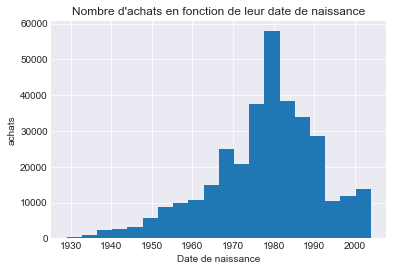

In [41]:
#Nombre d'achats par date de naissance : 

#On commence par joindre les deux df data_cust et data_transac : 
achat_age = pd.merge(data_cust, data_transac, left_on="client_id", right_on="client_id", how="right")

achat_age = achat_age[["birth", "session_id"]]

achat_age = achat_age.reset_index()

achat_age["birth"].hist(bins=20)
plt.xlabel('Date de naissance')
plt.ylabel('achats')
plt.title("Nombre d'achats en fonction de leur date de naissance")
plt.savefig("Graphiques/nb_achats_par_dates_de_naissances.png")
plt.show()

Achats par sexe :

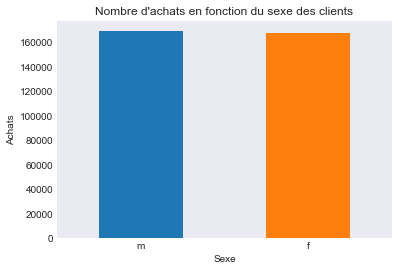

In [42]:
#Achats par sexe : 

#D'abord on merge les deux df data_cust et data_transac : 
achat_sex = pd.merge(data_cust, data_transac, left_on="client_id", right_on="client_id", how="right")

achat_sex = achat_sex[["sex", "session_id"]]

achat_sex["sex"].value_counts().plot(kind='bar')
plt.title("Nombre d'achats en fonction du sexe des clients")
plt.xlabel('Sexe')
plt.ylabel('Achats')
plt.xticks(rotation = 'horizontal')
plt.yticks(rotation = 'horizontal')
plt.savefig("Graphiques/Nb_achat_sexe_clients")
plt.show()

Client_id n'ayant pas acheté ?

In [43]:
acheteur = pd.merge(data_cust, data_transac, left_on='client_id', right_on = 'client_id', how = 'left')

acheteur[acheteur['session_id'] == np.NaN]
#Df vide, pas de client_id sans achat.

,client_id,sex,birth,age,tranche_x,id_prod,date,session_id,time,year,month,day,hour,minute,seconde,weekday,tranche_y


# Mission 3 / Correlation

## Corrélation entre sexe des clients et catégories

On pose ici deux hypothèse : 
H0 : Les deux variables ne sont pas corrélées entre elles
H1 : Les deux variables sont corrélées entre elles

In [44]:
#Jointure entre data_cust et data_transac (jointure interne) : 

sex_categ = pd.merge(data_cust, data_transac, left_on='client_id', right_on='client_id')
sex_categ = sex_categ[['client_id', 'sex', 'birth', 'tranche_x', 'id_prod']]

#Puis on merge avec data_prod 
#(attention ici jointure externe à gauche pour garder toutes les lignes de notre premier df): 

sex_categ = pd.merge(sex_categ, data_prod, how = 'left')
sex_categ = sex_categ[['sex', 'categ']]

sex_categ.head()

,sex,categ
0,f,0
1,f,0
2,f,1
3,f,1
4,f,0


Calcul XI_n

In [45]:
#Affichons le tableau de contingence des 2 variables qualitatives sex et categ : 
X = "sex"
Y = "categ"

c = sex_categ[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont1 = c.copy()

tx = sex_categ[X].value_counts()
ty = sex_categ[Y].value_counts()

cont1.loc[:,"Total"] = tx
cont1.loc["total",:] = ty
cont1.loc["total","Total"] = len(sex_categ)
cont1

categ,0,1,2,Total
sex,,,,
f,103846.0,55469.0,8260.0,167575.0
m,105683.0,54266.0,9292.0,169241.0
total,209529.0,109735.0,17552.0,336816.0


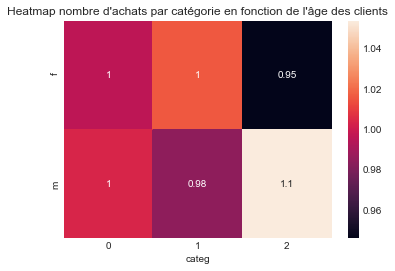

In [46]:
#Puis xi_n et la heatmap : 
import seaborn as sns

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(sex_categ)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
fig, ax = plt.subplots()
sns.heatmap(c/indep,annot=c/indep, ax=ax) #C/indep pour voir la différence entre valeur observée et valeur théorique sous h0
plt.savefig("Graphiques/sexe_client_categ_achetees_heatmap.png")
plt.title("Heatmap nombre d'achats par catégorie en fonction de l'âge des clients")
plt.show()

#On voit ici que les ventes dans la catégorie 2 ne correspondent pas à ce à quoi on pourrait s'attendre
#La catégorie 1 diffère elle aussi 
#On peut donc penser à une corrélation entre sexe des clients et catégorie achetée
#Vérifions cela par du calcul à l'étape suivante.

Calcul CHI2

In [47]:
import scipy.stats
from scipy.stats import chi2_contingency

chi2, pvalue, degrees, expected = chi2_contingency(c)
print(chi2, ",", degrees, ",", pvalue)

if pvalue < 0.05 :
    print("On rejette H0, il y a donc corrélation entre le sexe du client et la catégorie achetée")
else : 
    print("On ne rejette pas H0, il n'y a donc pas de corrélation entre le sexe du client et la catégorie achetée")

#Ici on peux même rejetter même H0 pour Alpha = 1%

81.73335807676145 , 2 , 1.7857752515034613e-18
On rejette H0, il y a donc corrélation entre le sexe du client et la catégorie achetée


## Outliners  : 

Comme nous avons pu le voir précédement, le nombre de client âgés de 18 ans ne représente pas la réalité. Enlevons donc ces clients de nos analyses de corrélations

In [48]:
data_cust_md = data_cust[data_cust.age > 18]

Idem pour les gros clients qui achètent en B to B, nous nous intéressons ici seulement aux clients B to C

In [49]:
transac_btoc = data_transac[(data_transac.client_id != "c_1609") & (data_transac.client_id != "c_4958") 
                            & (data_transac.client_id != "c_6714") & (data_transac.client_id != "c_3454")]

Il faut aussi enlever les clients agés de 18 ans dans la jointure data_cust/data_transac, en prenant transac_btoc

In [50]:
cust_transac = pd.merge(data_cust, data_transac, left_on='client_id', right_on='client_id', how='left')
cust_transac = cust_transac[cust_transac.age > 18]
cust_transac = cust_transac[(cust_transac.client_id != "c_1609") & (cust_transac.client_id != "c_4958") & (cust_transac.client_id != "c_6714") & (cust_transac.client_id != "c_3454")]

Et enlever les id_prod des 4 gros clients dans la jointure data_transac / data_prod 

In [51]:
transac_prod = pd.merge(data_transac, data_prod, left_on='id_prod', right_on='id_prod', how='left')
transac_prod = transac_prod[(transac_prod.client_id != "c_1609") & (transac_prod.client_id != "c_4958") & (transac_prod.client_id != "c_6714") & (transac_prod.client_id != "c_3454")]

Puis on enlève le tout sur la double jointure data_cust / data_transac / data_prod

In [52]:
data_all = pd.merge(data_cust, data_transac, left_on='client_id', right_on='client_id', how='left')
data_all = pd.merge(data_all, data_prod, left_on='id_prod', right_on='id_prod', how='left')

data_all = data_all[data_all.age > 18]
data_all = data_all[(data_all.client_id != "c_1609") & (data_all.client_id != "c_4958") & (data_all.client_id != "c_6714") & (data_all.client_id != "c_3454")]

## Age des clients et montants des achats

### Préparation du fichier

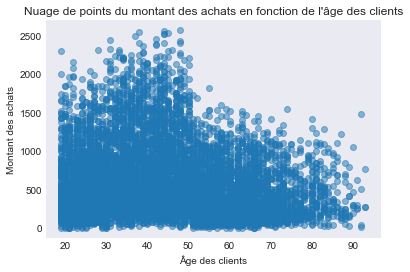

In [53]:
age_montant = data_all

age_montant = age_montant[["client_id", "age", "price"]]

age_montant = age_montant.groupby(["client_id", "age"]).sum()

age_montant = age_montant.reset_index(level="age")

plt.plot(age_montant['age'], age_montant['price'], 'o', alpha=0.5)
plt.xlabel('Âge des clients')
plt.ylabel('Montant des achats')
plt.title("Nuage de points du montant des achats en fonction de l'âge des clients")
plt.savefig("Graphiques/nuage_points_age_clients_montant_achats.png")
plt.show()

In [54]:
#Calcul du coéfficient de corrélation : 
import scipy.stats as st
import numpy as np

print("Le coefficient de corrélation de Pearson est égal à ",st.pearsonr(age_montant['age'], age_montant['price'])[0], "Il n'y a donc pas de corrélation")

Le coefficient de corrélation de Pearson est égal à  -0.19627248268175734 Il n'y a donc pas de corrélation


## Age des clients et fréquence d'achat

Préparation du fichier : 

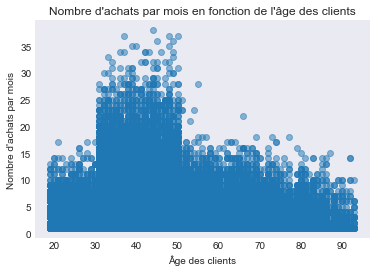

In [55]:
#coef linéaire : 
#On utilise transac_btoc et non data_transac pour enlever les outliners
age_freq = cust_transac

age_freq = age_freq[['client_id', 'age', 'month', 'session_id']]
age_freq = age_freq.groupby(['client_id', 'age', 'month']).count()
age_freq = age_freq.reset_index()

plt.plot(age_freq.age, age_freq.session_id, 'o', alpha=0.5)
plt.xlabel("Âge des clients")
plt.ylabel("Nombre d'achats par mois")
plt.title("Nombre d'achats par mois en fonction de l'âge des clients")
plt.savefig("Graphiques/nuage_points_nbr_achats_par_mois_age_clients.png")
plt.show()

In [56]:
print("Le coefficient de corrélation de Pearson est égal à ",st.pearsonr(age_freq['age'], age_freq['session_id'])[0], "Il n'y a donc pas de corrélation")

Le coefficient de corrélation de Pearson est égal à  -0.09325288700249074 Il n'y a donc pas de corrélation


## Age des clients et taille du panier moyen

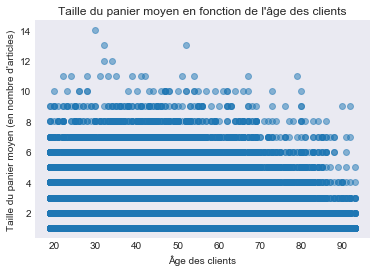

In [57]:
age_panier = data_all
age_panier = age_panier[["session_id", "age", "price"]]
age_panier = age_panier.groupby(["session_id", "age"]).count()
age_panier = age_panier.reset_index(level="age")

plt.plot(age_panier.age, age_panier.price, "o", alpha=0.5)
plt.xlabel("Âge des clients")
plt.ylabel("Taille du panier moyen (en nombre d'articles)")
plt.title("Taille du panier moyen en fonction de l'âge des clients")
plt.savefig("Graphiques/nuage_points_taille_panier_moyen_age_clients.png")
plt.show()

In [58]:
print("Le coefficient de corrélation de Pearson est égal à ",st.pearsonr(age_panier.age, age_panier.price)[0], "Il n'y a donc pas de corrélation")

Le coefficient de corrélation de Pearson est égal à  -0.21643048593726097 Il n'y a donc pas de corrélation


## Age des clients et catégories achetées

Préparation du fichier

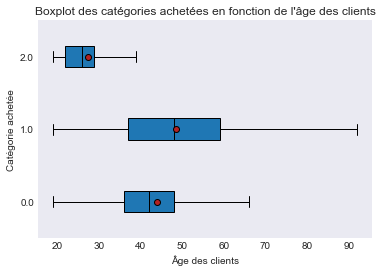

In [59]:
age_categ = data_all

age_categ = age_categ[["client_id","age", "categ", "price"]]

X = "categ" # qualitative

Y = "age" # quantitative

sous_echantillon = age_categ

modalites = sous_echantillon[X].unique()

groupes = []

for m in modalites:

    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

medianprops = {'color':"black"}

meanprops = {'marker':'o', 'markeredgecolor':'black',

            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 

            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Boxplot des catégories achetées en fonction de l'âge des clients")
plt.xlabel("Âge des clients")
plt.ylabel("Catégorie achetée")
plt.savefig("Graphiques/boxplot_categ_age_clients.png")
plt.show()

ANOVA

In [60]:
X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print(eta_squared(age_categ[X],age_categ[Y]))
print("Eta² est proche de 0, il n'y a donc pas de corrélation entre l'âge des clients et la catégorie achetée.")

0.0994181649234944
Eta² est proche de 0, il n'y a donc pas de corrélation entre l'âge des clients et la catégorie achetée.
